In [1]:
import sqc
import numpy as np
import matplotlib.pyplot as plt

# Control-U gates (see also Problem Set 2, Problem 1)

In [2]:
def A(i,o):
    return o.Rz(i,np.pi/4.0).H(i).Rz(i,np.pi/2.0)

def Adg(i,o):
    return o.Rz(i,-np.pi/2.0).H(i).Rz(i,-np.pi/4.0)

def CH(i,t,o): # i=control, t=target
    return A(t,Adg(t,o).CNOT(i,t))

def CRz(i,t,phi,o):
    return o.Rz(t,phi/2.).CNOT(i,t).Rz(t,-phi/2.).Rz(i,phi/2.).CNOT(i,t)

op=sqc.operator(2)

for i in range(4):
    st=sqc.state(2,v = [ 1 if i == j else 0 for j in range(4) ])

    print("Applying CH(0,1) to %s gives:\n%s\n" % (str(st),str(CH(0,1,op)*st)))
    print("Applying CRz(0,1,Pi/2) to %s gives:\n%s\n" % (str(st),str(CRz(0,1,np.pi/2.,op)*st)))

Applying CH(0,1) to    1 * |00> gives:
   0.9999999999999998 * |00>

Applying CRz(0,1,Pi/2) to    1 * |00> gives:
   (1+0j) * |00>

Applying CH(0,1) to    1 * |01> gives:
   0.7071067811865475 * |01>
 + 0.7071067811865474 * |11>

Applying CRz(0,1,Pi/2) to    1 * |01> gives:
   (1+0j) * |01>

Applying CH(0,1) to    1 * |10> gives:
   0.9999999999999998 * |10>

Applying CRz(0,1,Pi/2) to    1 * |10> gives:
   (1+0j) * |10>

Applying CH(0,1) to    1 * |11> gives:
   0.7071067811865474  * |01>
 + -0.7071067811865475 * |11>

Applying CRz(0,1,Pi/2) to    1 * |11> gives:
   (2.220446049250313e-16+1j) * |11>



# $C^2X^{1/n}$ gate (see also Lecture Section 1.1.7)

$X^{1/n}=H R_{\pi/n} H$

In [3]:
def CrootX(i,t,n,o):
    return CH(i,t,CRz(i,t,np.pi/n,CH(i,t,o)))

def CNOT(i,j,o):
    return o.CNOT(i,j)

def C2rootX(i,j,t,n,o): #i,j=control; t=target
    return CrootX(i,t,2.*n,CNOT(i,j,CrootX(j,t,-2.*n,CNOT(i,j,CrootX(j,t,2.*n,o)))))

op=sqc.operator(3)
for i in range(8):
    st=sqc.state(3,v = [ 1 if i == j else 0 for j in range(8) ])

    print("Applying C2NOT(0,1,2) to %s gives:\n%s\n" % (str(st),str(C2rootX(0,1,2,1,op)*st)))

Applying C2NOT(0,1,2) to    1 * |000> gives:
   0.999999999999999 * |000>

Applying C2NOT(0,1,2) to    1 * |001> gives:
   0.9999999999999989 * |001>

Applying C2NOT(0,1,2) to    1 * |010> gives:
   0.9999999999999989 * |010>

Applying C2NOT(0,1,2) to    1 * |011> gives:
   0.9999999999999988 * |111>

Applying C2NOT(0,1,2) to    1 * |100> gives:
   0.9999999999999989 * |100>

Applying C2NOT(0,1,2) to    1 * |101> gives:
   0.9999999999999989 * |101>

Applying C2NOT(0,1,2) to    1 * |110> gives:
   0.9999999999999989 * |110>

Applying C2NOT(0,1,2) to    1 * |111> gives:
   0.9999999999999991 * |011>



# $C^nX^{1/m}$ (see also Lecture Section 1.1.7)

In Problem Set 02, we will learn a much faster implementation, that requires additional worker qubits.

In [4]:
def CnrootX(c,t,m,o): #c=array of n control qubits; t=target qubit
    assert(len(c)>0)
    if len(c) == 1:
        return CrootX(c[0],t,m,o)
    i=[ c[0] ]
    j=[ c[1] ]
    r=c[2:]
    return CnrootX(r + i,t,2.*m,CnrootX(r+i,j[0],1.,CnrootX(r+j,t,-2.*m,CnrootX(r+i,j[0],1.,CnrootX(r+j,t,2.*m,o)))))

op=sqc.operator(4)
for i in range(16):
    st=sqc.state(4,v = [ 1 if i == j else 0 for j in range(16) ])

    print("Applying CnNOT([0,1,2],3) to %s gives:\n%s\n" % (str(st),str(CnrootX([0,1,2],3,1,op)*st)))

Applying CnNOT([0,1,2],3) to    1 * |0000> gives:
   0.9999999999999921 * |0000>

Applying CnNOT([0,1,2],3) to    1 * |0001> gives:
   0.9999999999999909 * |0001>

Applying CnNOT([0,1,2],3) to    1 * |0010> gives:
   0.9999999999999921 * |0010>

Applying CnNOT([0,1,2],3) to    1 * |0011> gives:
   0.9999999999999909 * |0011>

Applying CnNOT([0,1,2],3) to    1 * |0100> gives:
   0.9999999999999907 * |0100>

Applying CnNOT([0,1,2],3) to    1 * |0101> gives:
   0.9999999999999912 * |0101>

Applying CnNOT([0,1,2],3) to    1 * |0110> gives:
   0.9999999999999913 * |0110>

Applying CnNOT([0,1,2],3) to    1 * |0111> gives:
   0.9999999999999909 * |1111>

Applying CnNOT([0,1,2],3) to    1 * |1000> gives:
   0.999999999999991 * |1000>

Applying CnNOT([0,1,2],3) to    1 * |1001> gives:
   0.9999999999999912 * |1001>

Applying CnNOT([0,1,2],3) to    1 * |1010> gives:
   0.9999999999999908 * |1010>

Applying CnNOT([0,1,2],3) to    1 * |1011> gives:
   0.9999999999999908 * |1011>

Applying CnNOT([0

# Circular shift

In [5]:
def SWAP(i,j,o):
    return o.CNOT(i,j).CNOT(j,i).CNOT(i,j)

def Cl(mask,o):
    for i in mask[1:]:
        o=SWAP(mask[0],i,o)
    return o
    
def Cr(mask,o):
    for i in reversed(mask[:-1]):
        o=SWAP(mask[-1],i,o)
    return o

op=sqc.operator(4)
st=sqc.state(4,v=[0,1] + [0]*14)
for i in range(4):
    print("Cl^%d |0001> = %s" % (i,str(st)))
    st=Cl([0,1,2],op)*st
    
st=sqc.state(4,v=[0,1] + [0]*14)
for i in range(4):
    print("Cr^%d |0001> = %s" % (i,str(st)))
    st=Cr([0,1,2],op)*st

Cl^0 |0001> =    1 * |0001>
Cl^1 |0001> =    1.0 * |0010>
Cl^2 |0001> =    1.0 * |0100>
Cl^3 |0001> =    1.0 * |0001>
Cr^0 |0001> =    1 * |0001>
Cr^1 |0001> =    1.0 * |0100>
Cr^2 |0001> =    1.0 * |0010>
Cr^3 |0001> =    1.0 * |0001>


# Grover search for 2x=10 (see Lecture Section 1.2.2)

Optimal_k = 3


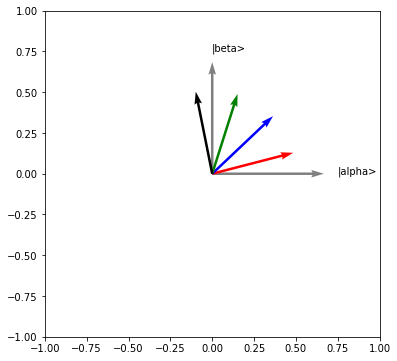

Optimal_angle = 101.343


In [6]:
nqubits=4
expected_theta=2.*np.arccos(np.sqrt((2**nqubits - 1.)/(2**nqubits)))
optimal_k = int(np.round(np.pi / 4. * np.sqrt(2**nqubits)))

print("Optimal_k = %d" % optimal_k)

plt.figure(figsize=(6,6))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.quiver([0],[0],[0,1],[1,0],   color=['gray'], scale=3)

plt.text(0.75,0,"|alpha>")

plt.text(0,0.75,"|beta>")

# TODO: theta_k
plt.quiver([0],[0],[np.cos(expected_theta*(i+0.5)) for i in range(optimal_k+1)],
        [np.sin(expected_theta*(i+0.5)) for i in range(optimal_k+1)],   color=['r','b','g','black'], scale=4)
plt.show()

expected_theta_deg=expected_theta / np.pi * 180.
print("Optimal_angle = %g" % ((optimal_k+0.5)*expected_theta_deg))


In [7]:
print("Startup Grover Search")
print("--------------------------------------")

Nbits=nqubits+2 # bits for x, 1 ancilla bit, 1 for y

def pr(i,start,width):
    return (i//2**start)%(2**width)

# Psi0
psi0=sqc.operator(Nbits).X(nqubits+1) * sqc.state(Nbits, 
            basis=[ "|%d>|%d>|%d>" % (pr(i,0,nqubits),pr(i,nqubits,1),pr(i,nqubits+1,i)) for i in range(2**Nbits) ])
print("|Psi0> = ")
print(psi0)
print("") # TODO: continue here

# Psi1
psi1=sqc.operator(Nbits).H(0).H(1).H(2).H(3).H(5) * psi0
print("|Psi1> = ")
print(psi1)
print("")

Startup Grover Search
--------------------------------------
|Psi0> = 
   (1+0j) * |0>|0>|1>

|Psi1> = 
   (0.1767766952966368+0j)  * |0>|0>|0>
 + (0.1767766952966368+0j)  * |1>|0>|0>
 + (0.1767766952966368+0j)  * |2>|0>|0>
 + (0.1767766952966368+0j)  * |3>|0>|0>
 + (0.1767766952966368+0j)  * |4>|0>|0>
 + (0.1767766952966368+0j)  * |5>|0>|0>
 + (0.1767766952966368+0j)  * |6>|0>|0>
 + (0.1767766952966368+0j)  * |7>|0>|0>
 + (0.1767766952966368+0j)  * |8>|0>|0>
 + (0.1767766952966368+0j)  * |9>|0>|0>
 + (0.1767766952966368+0j)  * |10>|0>|0>
 + (0.1767766952966368+0j)  * |11>|0>|0>
 + (0.1767766952966368+0j)  * |12>|0>|0>
 + (0.1767766952966368+0j)  * |13>|0>|0>
 + (0.1767766952966368+0j)  * |14>|0>|0>
 + (0.1767766952966368+0j)  * |15>|0>|0>
 + (-0.1767766952966368+0j) * |0>|0>|1>
 + (-0.1767766952966368+0j) * |1>|0>|1>
 + (-0.1767766952966368+0j) * |2>|0>|1>
 + (-0.1767766952966368+0j) * |3>|0>|1>
 + (-0.1767766952966368+0j) * |4>|0>|1>
 + (-0.1767766952966368+0j) * |5>|0>|1>
 + (-0.176

In [8]:
def Uf(o): # additional 4 bit in CnrootX is to check for overflow in f(x)=2x
    return Cr([0,1,2,3,4],CnrootX([0,1,2,3,4],5,1.,Cl([0,1,2,3,4],o).X(0).X(2).X(4)).X(0).X(2).X(4))

def Usdiag(o): # 2|0><0| - sum_i |i><i|, draw circuit?
    return CnrootX([0,1,2,3],4,1.,CnrootX([0,1,2,3],4,1.,o.X(0).X(1).X(2).X(3)).X(4).Rz(4,np.pi)).X(0).X(1).X(2).X(3).X(4)

uf=Uf(sqc.operator(Nbits))
print("Uf |psi1> = ")
print(uf * psi1)
print("")

print("Usdiag |psi1> = ")
print(Usdiag(sqc.operator(Nbits)) * psi1)
print("")

us=Usdiag(sqc.operator(Nbits).H(0).H(1).H(2).H(3)).H(0).H(1).H(2).H(3)
print("Us |psi1> = ")
print(us * psi1)
print("")

Uf |psi1> = 
   (0.17677669529659637+0j)  * |0>|0>|0>
 + (0.17677669529659565+0j)  * |1>|0>|0>
 + (0.17677669529659593+0j)  * |2>|0>|0>
 + (0.17677669529659673+0j)  * |3>|0>|0>
 + (0.17677669529659623+0j)  * |4>|0>|0>
 + (-0.17677669529659537+0j) * |5>|0>|0>
 + (0.1767766952965956+0j)   * |6>|0>|0>
 + (0.17677669529659568+0j)  * |7>|0>|0>
 + (0.17677669529659643+0j)  * |8>|0>|0>
 + (0.17677669529659598+0j)  * |9>|0>|0>
 + (0.1767766952965987+0j)   * |10>|0>|0>
 + (0.1767766952965967+0j)   * |11>|0>|0>
 + (0.1767766952965967+0j)   * |12>|0>|0>
 + (0.17677669529659543+0j)  * |13>|0>|0>
 + (0.17677669529659704+0j)  * |14>|0>|0>
 + (0.1767766952965956+0j)   * |15>|0>|0>
 + (-0.17677669529659681+0j) * |0>|0>|1>
 + (-0.17677669529659623+0j) * |1>|0>|1>
 + (-0.17677669529659776+0j) * |2>|0>|1>
 + (-0.1767766952965976+0j)  * |3>|0>|1>
 + (-0.1767766952965968+0j)  * |4>|0>|1>
 + (0.17677669529659643+0j)  * |5>|0>|1>
 + (-0.17677669529659665+0j) * |6>|0>|1>
 + (-0.17677669529659565+0j) * |7>|0>|

Start Grover Iteration 0
|Psi2> = 
   (0.17677669529659637+0j)  * |0>|0>|0>
 + (0.17677669529659565+0j)  * |1>|0>|0>
 + (0.17677669529659593+0j)  * |2>|0>|0>
 + (0.17677669529659673+0j)  * |3>|0>|0>
 + (0.17677669529659623+0j)  * |4>|0>|0>
 + (-0.17677669529659537+0j) * |5>|0>|0>
 + (0.1767766952965956+0j)   * |6>|0>|0>
 + (0.17677669529659568+0j)  * |7>|0>|0>
 + (0.17677669529659643+0j)  * |8>|0>|0>
 + (0.17677669529659598+0j)  * |9>|0>|0>
 + (0.1767766952965987+0j)   * |10>|0>|0>
 + (0.1767766952965967+0j)   * |11>|0>|0>
 + (0.1767766952965967+0j)   * |12>|0>|0>
 + (0.17677669529659543+0j)  * |13>|0>|0>
 + (0.17677669529659704+0j)  * |14>|0>|0>
 + (0.1767766952965956+0j)   * |15>|0>|0>
 + (-0.17677669529659681+0j) * |0>|0>|1>
 + (-0.17677669529659623+0j) * |1>|0>|1>
 + (-0.17677669529659776+0j) * |2>|0>|1>
 + (-0.1767766952965976+0j)  * |3>|0>|1>
 + (-0.1767766952965968+0j)  * |4>|0>|1>
 + (0.17677669529659643+0j)  * |5>|0>|1>
 + (-0.17677669529659665+0j) * |6>|0>|1>
 + (-0.176776695

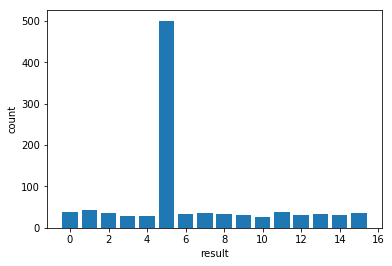

Start Grover Iteration 1
|Psi2> = 
   (0.13258252147240426+0j)  * |0>|0>|0>
 + (0.1325825214724045+0j)   * |1>|0>|0>
 + (0.13258252147240446+0j)  * |2>|0>|0>
 + (0.1325825214724043+0j)   * |3>|0>|0>
 + (0.13258252147240443+0j)  * |4>|0>|0>
 + (-0.4861359120654806+0j)  * |5>|0>|0>
 + (0.1325825214724047+0j)   * |6>|0>|0>
 + (0.13258252147240468+0j)  * |7>|0>|0>
 + (0.13258252147240432+0j)  * |8>|0>|0>
 + (0.13258252147240449+0j)  * |9>|0>|0>
 + (0.1325825214724038+0j)   * |10>|0>|0>
 + (0.1325825214724043+0j)   * |11>|0>|0>
 + (0.13258252147240426+0j)  * |12>|0>|0>
 + (0.1325825214724045+0j)   * |13>|0>|0>
 + (0.13258252147240412+0j)  * |14>|0>|0>
 + (0.13258252147240446+0j)  * |15>|0>|0>
 + (-0.13258252147240507+0j) * |0>|0>|1>
 + (-0.13258252147240526+0j) * |1>|0>|1>
 + (-0.13258252147240493+0j) * |2>|0>|1>
 + (-0.13258252147240498+0j) * |3>|0>|1>
 + (-0.13258252147240523+0j) * |4>|0>|1>
 + (0.4861359120654815+0j)   * |5>|0>|1>
 + (-0.13258252147240535+0j) * |6>|0>|1>
 + (-0.132582521

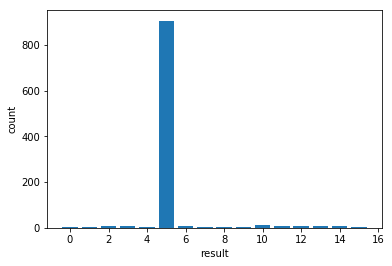

Start Grover Iteration 2
|Psi2> = 
   (0.05524271728015089+0j)   * |0>|0>|0>
 + (0.055242717280150525+0j)  * |1>|0>|0>
 + (0.055242717280150656+0j)  * |2>|0>|0>
 + (0.05524271728015103+0j)   * |3>|0>|0>
 + (0.055242717280150816+0j)  * |4>|0>|0>
 + (-0.6739611508178335+0j)   * |5>|0>|0>
 + (0.055242717280150413+0j)  * |6>|0>|0>
 + (0.055242717280150434+0j)  * |7>|0>|0>
 + (0.05524271728015092+0j)   * |8>|0>|0>
 + (0.05524271728015071+0j)   * |9>|0>|0>
 + (0.0552427172801522+0j)    * |10>|0>|0>
 + (0.055242717280151045+0j)  * |11>|0>|0>
 + (0.05524271728015107+0j)   * |12>|0>|0>
 + (0.05524271728015026+0j)   * |13>|0>|0>
 + (0.055242717280151246+0j)  * |14>|0>|0>
 + (0.05524271728015044+0j)   * |15>|0>|0>
 + (-0.055242717280151586+0j) * |0>|0>|1>
 + (-0.05524271728015129+0j)  * |1>|0>|1>
 + (-0.05524271728015207+0j)  * |2>|0>|1>
 + (-0.05524271728015194+0j)  * |3>|0>|1>
 + (-0.05524271728015151+0j)  * |4>|0>|1>
 + (0.6739611508178353+0j)    * |5>|0>|1>
 + (-0.05524271728015143+0j)  * |6>

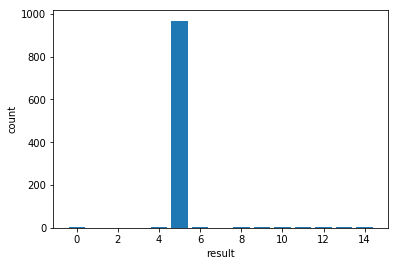

In [9]:
psiA=psi1
for i in range(optimal_k):
    print("Start Grover Iteration %d" % i)
    
    # Psi2
    psi2=uf * psiA
    print("|Psi2> = ")
    print(psi2)
    print("")

    # Psi3
    psi3=us * psi2
    print("|Psi3> = ")
    print(psi3)
    print("")
    
    psiA=psi3

    # Measurement
    res=sqc.sample(psi3, n=1000, mask=[0,1,2,3])
    print(res)
    plt.bar(res.keys(),res.values())
    plt.xlabel('result')
    plt.ylabel('count')
    plt.show()
